### Objective


In this dataset we have to predict where the tweet is sexist/racist or not. In other words we have to check if the tweet contains hate speech or not.

Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, your objective is to predict the labels on the given test dataset.



### Table of Content

- Objective
- Loading the libraries and dataset
- Text Cleaning & Preprocessing
      1. Cleaning the text using regex
      2. Tokenization
      3. Stemming & Lemmatization
- Data Visualization with WordCloud
- Word Vectorization(BOW,TFIDF,WE)
- Model Building
- Making Submission

#### Loading the libraries and dataset

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import nltk
from nltk.corpus import stopwords
import string
import re
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

pd.set_option('display.max_colwidth', 300) 

In [2]:
train  = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
print('Shape of train dataset : ',format(train.shape))
print('Shape of test dataset : ',format(test.shape))

Shape of train dataset :  (31962, 3)
Shape of test dataset :  (17197, 2)


In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [5]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [6]:
data=train.append(test, ignore_index=True)

In [7]:
print('Shape of Combined dataset : ',format(data.shape))

Shape of Combined dataset :  (49159, 3)


In [8]:
data.isnull().sum()

id           0
label    17197
tweet        0
dtype: int64

#### Text Cleaning & Preprocessing

Text cleaning and Preprocessing is a necessary step as it converts unstructured data into Structured data.
The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

##### 1.Cleaning the text using regex

As we can see from the first few tweets that we need to do the following:

- Removal of **@User** because it  is hardly conveying any information
- Removal of **Special Ch,Punctuations and numbers**.
- Removal of **Words : len(word)<=3**.

In [9]:


# def remove_pattern(input_txt, pattern):
#     r = re.findall(pattern, input_txt)
#     for i in r:
#         input_txt = re.sub(i, '', input_txt)
        
#     return input_txt 

# data['tidy_tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")

In [10]:
## Removal of @User
def clean_user(tokens):
    
    return re.sub(r'@[\w]*','',str(tokens))

data['cleaned_tweet']=data['tweet'].apply(lambda x: clean_user(x))

In [11]:
data['cleaned_tweet'].head()

0                     when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
1      thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
2                                                                                                 bihday your majesty
3                              #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦  
4                                                                              factsguide: society now    #motivation
Name: cleaned_tweet, dtype: object

In [12]:
data.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [13]:
## Removal of Special Ch,Punctuations and numbers.

def remove_special_ch(tokens):
    return re.sub("[^a-zA-Z#]", " ",str(tokens))

data['cleaned_tweet']=data['cleaned_tweet'].apply(lambda x: remove_special_ch(x))

In [14]:
data['cleaned_tweet'].head()

0                     when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run
1      thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked
2                                                                                                 bihday your majesty
3                              #model   i love u take with u all the time in ur                                      
4                                                                              factsguide  society now    #motivation
Name: cleaned_tweet, dtype: object

In [15]:
data.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [16]:
##Words : len(word)<=3

data['cleaned_tweet']=data['cleaned_tweet'].apply(lambda word : ''.join([word for i in word.split() if len(i)>3] ))

In [17]:
data.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run whe...
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked thanks for #lyft credit i can t use cause they don t offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesty bihday your majesty bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur #model i love u take with u all the time in ur #model i love u take with u all the time in ur #model i love u take with u all the ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation factsguide society now #motivation factsguide society now #motivation


##### You can see the difference between the raw tweets and the cleaned tweets  quite clearly. Only the important words in the tweets have been retained and the noise (numbers, punctuations, and special characters) has been removed.

In [18]:
data.shape

(49159, 4)

##### 2. Tokenization

In tokenization we split the whole sentences into words or tokens. In is simply a list of stings.

In [19]:
tokenized_tweets=data['cleaned_tweet'].apply(lambda x : x.split())

In [20]:
tokenized_tweets.head()

0    [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, #run, when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, #run, when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, k...
1    [thanks, for, #lyft, credit, i, can, t, use, cause, they, don, t, offer, wheelchair, vans, in, pdx, #disapointed, #getthanked, thanks, for, #lyft, credit, i, can, t, use, cause, they, don, t, offer, wheelchair, vans, in, pdx, #disapointed, #getthanked, thanks, for, #lyft, credit, i, can, t, use,...
2                                                                                                                                                                                                                                          [bihday, your, majesty, bihday, your, majesty, bihday, your, majesty]
3        [#model, i, love, u, take, with, u, all, the, time, in, ur, #model, i, love,

##### 3.Stemming & Lemmatization

- **Stemming**: In Stemming we strip the **suffix or prefix** from the token.

- **Lemmatization**: In Lemmatization we convert the token to its **root-form**.

**Note**: Generally Lemmatization is preferred as the tokens after conversion makes more sense.

In [21]:
# lemmatizer = WordNetLemmatizer()

# tokenized_tweets=tokenized_tweets.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweets.head()

0    [when, a, father, is, dysfunct, and, is, so, selfish, he, drag, hi, kid, into, hi, dysfunct, #run, when, a, father, is, dysfunct, and, is, so, selfish, he, drag, hi, kid, into, hi, dysfunct, #run, when, a, father, is, dysfunct, and, is, so, selfish, he, drag, hi, kid, into, hi, dysfunct, #run, w...
1    [thank, for, #lyft, credit, i, can, t, use, caus, they, don, t, offer, wheelchair, van, in, pdx, #disapoint, #getthank, thank, for, #lyft, credit, i, can, t, use, caus, they, don, t, offer, wheelchair, van, in, pdx, #disapoint, #getthank, thank, for, #lyft, credit, i, can, t, use, caus, they, do...
2                                                                                                                                                                                                                                          [bihday, your, majesti, bihday, your, majesti, bihday, your, majesti]
3        [#model, i, love, u, take, with, u, all, the, time, in, ur, #model, i, love,

In [22]:
tokenized_tweets

0        [when, a, father, is, dysfunct, and, is, so, selfish, he, drag, hi, kid, into, hi, dysfunct, #run, when, a, father, is, dysfunct, and, is, so, selfish, he, drag, hi, kid, into, hi, dysfunct, #run, when, a, father, is, dysfunct, and, is, so, selfish, he, drag, hi, kid, into, hi, dysfunct, #run, w...
1        [thank, for, #lyft, credit, i, can, t, use, caus, they, don, t, offer, wheelchair, van, in, pdx, #disapoint, #getthank, thank, for, #lyft, credit, i, can, t, use, caus, they, don, t, offer, wheelchair, van, in, pdx, #disapoint, #getthank, thank, for, #lyft, credit, i, can, t, use, caus, they, do...
2                                                                                                                                                                                                                                              [bihday, your, majesti, bihday, your, majesti, bihday, your, majesti]
3            [#model, i, love, u, take, with, u, all, the, time, in, ur, 

In [23]:
## Combining it into the dataframe

# for i in range(len(tokenized_tweets)):
#     tokenized_tweet[i] = ' '.join(tokenized_tweets[i])

# data['cleaned_tweet'] = tokenized_tweets


data['cleaned_tweet']=tokenized_tweets.apply(lambda x:' '.join([x[i] for i in range(len(x))]))

In [24]:
data.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run when a father is dysfunct and is so selfish he drag h...
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank for #lyft credit i can t use caus they don t offer wheelchair van in pdx #disapoint #getthank thank for #lyft credit i can t use caus they don t offer wheelchair van in pdx #disapoint #getthank thank for #lyft credit i can t use caus they don t offer wheelchair van in pdx #disapoint #getth...
2,3,0.0,bihday your majesty,bihday your majesti bihday your majesti bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur #model i love u take with u all the time in ur #model i love u take with u all the time in ur #model i love u take with u all the time in ur #model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguid societi now #motiv factsguid societi now #motiv factsguid societi now #motiv


#### Data Visualization

WordCloud can be used to visualize and understand the most common words that are present in the dataset.

In this section we will:
- Analyze the distribution of tweet in the whole dataset using WordCloud.
- Analyze the distribution of Positive tweets in the whole dataset using WordCloud.
- Analyze the distribution of Negative tweet in the whole dataset using WordCloud.
- Analyze the Importance of HashTag(#)

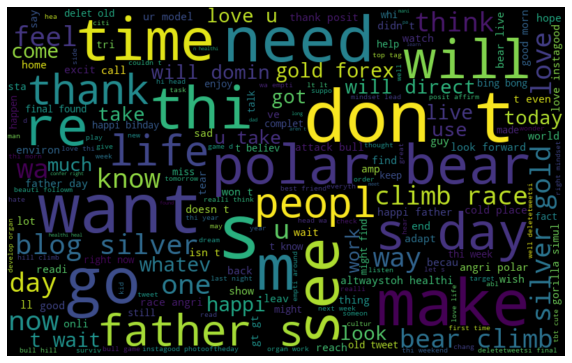

In [25]:
all_words=''.join([i for i in data['cleaned_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see that most of the common words belong to Positive tweets

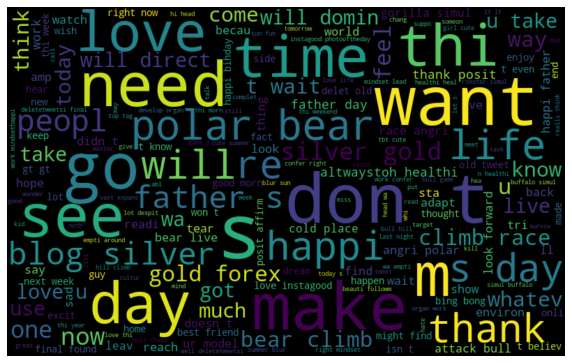

In [26]:
## Let us see the most common words for Positive/ non-racsist tweets

all_words_pos=''.join([i for i in data.loc[data['label']==0,'cleaned_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_pos)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

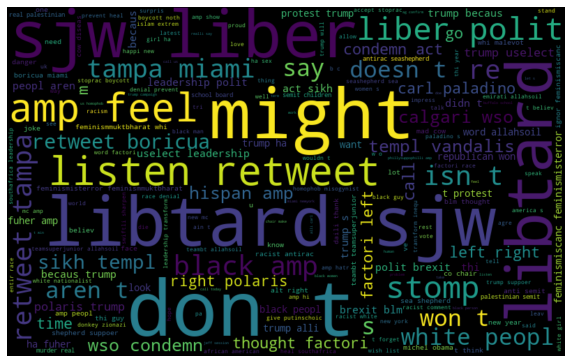

In [27]:
all_words_neg=''.join([i for i in data.loc[data['label']==1,'cleaned_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neg)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [28]:
## Analyze the Importance of HashTag(#)

##In this we will see and check if the HashTag is helpful in differenciating the labels.

In [29]:
data['cleaned_tweet'][0]

'when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run'

In [30]:
def hash_tag(x):
    ht=[]
    for i in x:
        res=re.findall(r"#(\w+)", i)
        ht.append(res)
    return ht

In [31]:
pos_ht=hash_tag(data['cleaned_tweet'][data['label'] == 0])
neg_ht=hash_tag(data['cleaned_tweet'][data['label'] == 1])

In [32]:
HT_regular = sum(pos_ht,[])
HT_negative = sum(neg_ht,[])

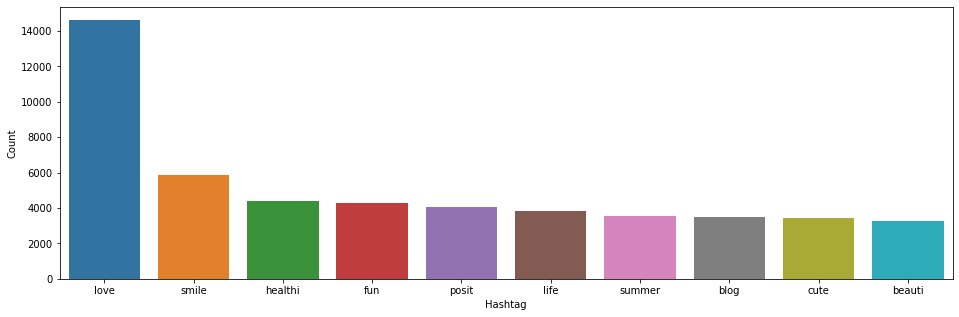

In [33]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

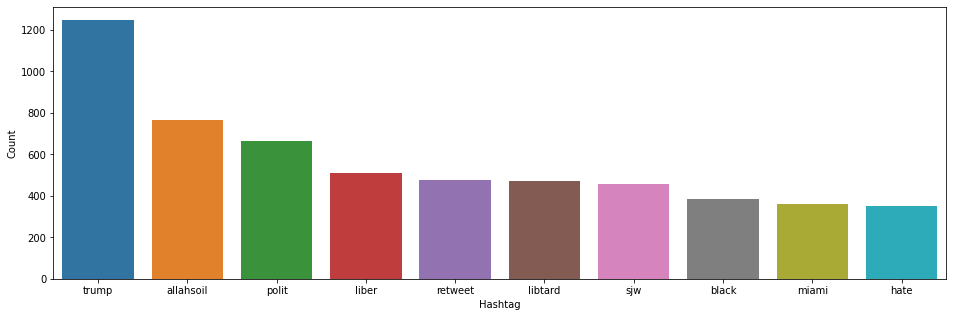

In [34]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count': list(b.values())})
# selecting top 10 most frequent hashtags     
e = e.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

#### Word Vectorization(BOW,TFIDF,WE)

In this we convert the pre-processed data into features.

- **TFIDF**: TFIDF works differently from BOW. It gives weighage to the words which are less frequent but stil appear in good number.

In [35]:
data.shape

(49159, 4)

In [36]:
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(data['cleaned_tweet'])

In [37]:
bow.shape

(49159, 1000)

In [38]:
TFIDF_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf = TFIDF_vectorizer.fit_transform(data['cleaned_tweet'])

#### Model Building

- In this section we will Try building model using both TFIDF and Bag Of Words(BOW) and will make predictions which ever gives us best accuracy.
- For Model building : Logistic Regression & Naive Bayes 

In [73]:
## Preparing the data

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

x_train_bow,x_test_bow,y_train_bow,y_test_bow=train_test_split(train_bow,train['label'],random_state=42, test_size=0.3)


train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf=train_test_split(train_tfidf,train['label'],random_state=42, test_size=0.3)

In [74]:
## Baseline Model

lreg = LogisticRegression(solver='newton-cg')
lreg.fit(x_train_bow, y_train_bow)

lreg_tfidf = LogisticRegression(solver='newton-cg')
lreg_tfidf.fit(x_train_tfidf, y_train_tfidf)

LogisticRegression(solver='newton-cg')

In [75]:
y_pred_tfidf=lreg_tfidf.predict(x_test_tfidf)

c:\users\dishaa\anaconda3\envs\dl\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

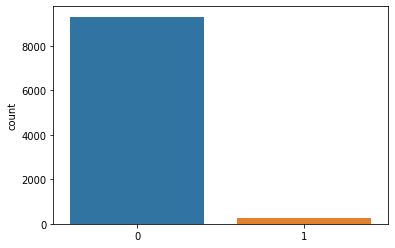

In [76]:
sns.countplot(y_pred_tfidf)

In [77]:
print('F1-Score for the Logistic Regression with BOW:',f1_score(y_test_bow, y_pred))

print('F1-Score for the Logistic Regression with TFIDF:',f1_score(y_test_tfidf, y_pred_tfidf))

F1-Score for the Logistic Regression with BOW: 0.4890061565523307
F1-Score for the Logistic Regression with TFIDF: 0.46887966804979253


In [59]:
print(classification_report(y_test_bow, y_pred))  ## BOW

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.61      0.41      0.49       684

    accuracy                           0.94      9589
   macro avg       0.78      0.69      0.73      9589
weighted avg       0.93      0.94      0.93      9589



##### We can see that our model is not able to predict the Racist/Sexsist tweets well and there is an uneven distribution of the between the label prediction.

In [78]:
print(classification_report(y_test_tfidf, y_pred_tfidf))  ## TFIDF

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8905
           1       0.81      0.33      0.47       684

    accuracy                           0.95      9589
   macro avg       0.88      0.66      0.72      9589
weighted avg       0.94      0.95      0.94      9589



In [82]:
print('F1-Score for the Logistic Regression with TFIDF',f1_score(y_test_tfidf, y_pred_tfidf))

F1-Score for the Logistic Regression with TFIDF 0.46887966804979253


In [68]:
## BOW
prediction = lreg.predict_proba(x_test_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

c:\users\dishaa\anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
## TFIDF
prediction_tfidf = lreg_tfidf.predict_proba(x_test_tfidf) # predicting on the validation set
prediction_int_tfidf = prediction_tfidf[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int_tfidf = prediction_int_tfidf.astype(np.int)

c:\users\dishaa\anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [69]:
print(classification_report(y_test_bow, prediction_int)) ## BOW

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8905
           1       0.55      0.49      0.52       684

    accuracy                           0.94      9589
   macro avg       0.76      0.73      0.74      9589
weighted avg       0.93      0.94      0.93      9589



In [80]:
print(classification_report(y_test_tfidf, prediction_int_tfidf)) ## TFIDF

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.67      0.46      0.55       684

    accuracy                           0.95      9589
   macro avg       0.81      0.72      0.76      9589
weighted avg       0.94      0.95      0.94      9589



In [71]:
print('F1-Score for the Logistic Regression with BOW after Threshold Tuning:',f1_score(y_test_bow, prediction_int))

F1-Score for the Logistic Regression with BOW after Threshold Tuning: 0.5212027756360833


##### So we can see that after altering the Threshold for Log.Reg we are ablr to get a better f1-Score of 0.52

In [81]:
print('F1-Score for the Logistic Regression with TFIDF after Threshold Tuning:',f1_score(y_test_tfidf, prediction_int_tfidf))

F1-Score for the Logistic Regression with TFIDF after Threshold Tuning: 0.5457685664939551


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.908


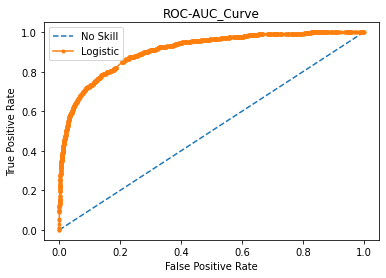

In [90]:
ns_probs = [0 for _ in range(len(y_test_tfidf))]


# lr_probs = lreg_tfidf.predict_proba(X_test_balanced)
# keep probabilities for the positive outcome only
lr_probs = prediction_tfidf[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_tfidf, ns_probs)
lr_auc = roc_auc_score(y_test_tfidf, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_tfidf, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_tfidf, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot

plt.title('ROC-AUC_Curve')

plt.show()

No Skill: ROC AUC=0.500
TFIDF Score: ROC AUC=0.908
BOW Score: ROC AUC=0.873


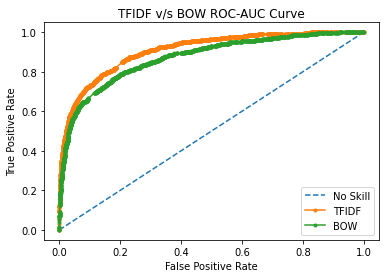

In [96]:
ns_probs = [0 for _ in range(len(y_test_tfidf))]

## TFIDF
lr_probs_tfidf = lreg_tfidf.predict_proba(x_test_tfidf)
# keep probabilities for the positive outcome only
lr_probs_tfidf = lr_probs_tfidf[:, 1]

## BOW
lr_probs_bow = lreg.predict_proba(x_test_bow)
# keep probabilities for the positive outcome only
lr_probs_bow = lr_probs_bow[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test_tfidf, ns_probs)
lr_auc_tfidf = roc_auc_score(y_test_tfidf, lr_probs_tfidf)
lr_auc_bow = roc_auc_score(y_test_bow, lr_probs_bow)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('TFIDF Score: ROC AUC=%.3f' % (lr_auc_tfidf))
print('BOW Score: ROC AUC=%.3f' % (lr_auc_bow))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_tfidf, ns_probs)
lr_fpr_tfidf, lr_tpr_tfidf, _ = roc_curve(y_test_tfidf, lr_probs_tfidf)
lr_fpr_bow, lr_tpr_bow, _ = roc_curve(y_test_bow, lr_probs_bow)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr_tfidf, lr_tpr_tfidf, marker='.', label='TFIDF')
plt.plot(lr_fpr_bow, lr_tpr_bow, marker='.', label='BOW')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('TFIDF v/s BOW ROC-AUC Curve')
# plt.savefig('Random_Forest ROC-AUC Curve.png')
plt.show()

In [98]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred_gnb = gnb.fit(x_train_tfidf.toarray(), y_train_tfidf).predict(x_test_tfidf.toarray())

In [99]:
print('F1-Score for the Gaussian NB with TFIDF :',f1_score(y_test_tfidf, y_pred_gnb))

F1-Score for the Gaussian NB with TFIDF : 0.2242579699523635


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.714


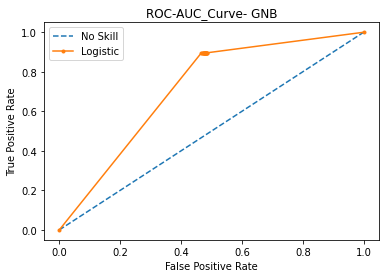

In [102]:
ns_probs = [0 for _ in range(len(y_test_tfidf))]


lr_probs = gnb.predict_proba(x_test_tfidf.toarray())
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_tfidf, ns_probs)
lr_auc = roc_auc_score(y_test_tfidf, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_tfidf, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_tfidf, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot

plt.title('ROC-AUC_Curve- GNB')

plt.show()

#### Making Submission

For making the

In [105]:
test_pred = gnb.predict_proba(test_tfidf.toarray())
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_gnb_tfidf.csv', index=False) # writing data to a CSV file

c:\users\dishaa\anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
